In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob

In [2]:
#set up path to import CSV files
CIK='0001765880'
path='SEC/0001765880/'
csvfiles=[file for file in os.listdir('sec/'+CIK) if file.endswith(".csv")]

In [3]:
#import CSV for dtype dictionary
file4='Column and DTYPE.csv'
dtypes= pd.read_csv(file4, index_col=0, header=None, squeeze=True).to_dict()
columns=list(dtypes.keys())
#date columns need to be parsed separately
datecols=['reportingPeriodBeginningDate','reportingPeriodEndingDate','interestPaidThroughDate','originationDate','loanMaturityDate','originalFirstPaymentDate']

In [4]:
#import all CSV files into single dataframe named frame
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, dtype=dtypes, usecols=columns, parse_dates=datecols)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
#define function that will optimize datatype and execute
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
reduce_mem_usage(frame)

Memory usage of dataframe is 288.36 MB
Memory usage after optimization is: 281.00 MB
Decreased by 2.6%


,assetNumber,reportingPeriodBeginningDate,reportingPeriodEndingDate,originationDate,originalLoanAmount,originalLoanTerm,loanMaturityDate,originalInterestRatePercentage,originalFirstPaymentDate,gracePeriodNumber,...,actualInterestCollectedAmount,actualPrincipalCollectedAmount,actualOtherCollectedAmount,interestPaidThroughDate,currentDelinquencyStatus,chargedoffPrincipalAmount,recoveredAmount,paymentExtendedNumber,repossessedIndicator,repossessedProceedsAmount
0,0001765880 - 000001,2019-01-01,2019-01-31,2013-12-01,29667.18,74,2020-01-01,0.1490,2014-02-01,2,...,94.06,535.21,0.0,2019-01-07,0.0,0.0,0.0,0,False,0.0
1,0001765880 - 000002,2019-01-01,2019-01-31,2013-12-01,22275.53,74,2020-09-01,0.0990,2014-02-01,2,...,153.39,413.61,0.0,2019-01-10,18.0,0.0,0.0,2,False,0.0
2,0001765880 - 000003,2019-01-01,2019-01-31,2013-12-01,10170.00,68,2019-11-01,0.1745,2014-02-01,2,...,0.00,0.00,0.0,2018-11-26,18.0,0.0,0.0,0,False,0.0
3,0001765880 - 000004,2019-01-01,2019-01-31,2013-12-01,10501.25,62,2019-05-01,0.0845,2014-02-01,2,...,10.26,205.69,0.0,2019-01-26,0.0,0.0,0.0,0,False,0.0
4,0001765880 - 000005,2019-01-01,2019-01-31,2013-12-01,33865.00,73,2020-06-01,0.1290,2014-01-01,1,...,259.11,840.89,0.0,2019-01-29,31.0,0.0,0.0,0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286654,0001765880 - 062802,2020-12-01,2020-12-31,2019-01-01,7507.97,74,2025-02-01,0.1599,2019-03-01,2,...,0.00,0.00,0.0,2020-11-27,17.0,0.0,0.0,0,False,0.0
1286655,0001765880 - 062803,2020-12-01,2020-12-31,2019-01-01,14458.80,73,2025-01-01,0.1055,2019-02-01,1,...,57.82,226.97,0.0,2020-12-11,8.0,0.0,0.0,0,False,0.0
1286656,0001765880 - 062806,2020-12-01,2020-12-31,2019-01-01,27903.29,74,2025-02-01,0.1163,2019-03-01,2,...,334.27,206.85,0.0,2020-12-03,0.0,0.0,0.0,0,False,0.0
1286657,0001765880 - 062808,2020-12-01,2020-12-31,2019-01-01,19091.88,74,2025-02-01,0.1455,2019-03-01,2,...,175.14,226.61,0.0,2020-12-10,0.0,0.0,0.0,0,False,0.0


In [6]:
#get a list of assets that were extended in April
extendedloans=frame.loc[(frame['paymentExtendedNumber']>0) & (frame['reportingPeriodEndingDate'] == '2020-04-30'),['assetNumber']]

In [7]:
#create a field in dataframe for COVID extension= True/False
frame['COVIDExt']= frame['assetNumber'].isin(extendedloans['assetNumber'])


In [12]:
#create a new dataframe sorting by reporting end date and columns for chargeoffs and beginning balances by COVID extended flag
CDRframe=pd.pivot_table(frame, values=['chargedoffPrincipalAmount','reportingPeriodBeginningLoanBalanceAmount'], columns='COVIDExt', index=['reportingPeriodEndingDate'], margins=False, aggfunc='sum')
CDRframe.columns = [f'{i}{j}' for i, j in CDRframe.columns]

In [14]:
#create total fields by adding 
CDRframe['chargedoffPrincipalAmountTotal']=CDRframe['chargedoffPrincipalAmountFalse']+CDRframe['chargedoffPrincipalAmountTrue']
CDRframe['reportingPeriodBeginningLoanBalanceAmountTotal']=CDRframe['reportingPeriodBeginningLoanBalanceAmountFalse']+CDRframe['reportingPeriodBeginningLoanBalanceAmountTrue']
CDRframe

,chargedoffPrincipalAmountFalse,chargedoffPrincipalAmountTrue,reportingPeriodBeginningLoanBalanceAmountFalse,reportingPeriodBeginningLoanBalanceAmountTrue,chargedoffPrincipalAmountTotal,reportingPeriodBeginningLoanBalanceAmountTotal
reportingPeriodEndingDate,,,,,,
2019-01-31,0.00,0.00,9.430954e+08,54903778.49,0.00,9.979991e+08
2019-02-28,14682.58,0.00,1.225927e+09,71541734.23,14682.58,1.297469e+09
2019-03-31,229486.37,0.00,1.204582e+09,71003991.21,229486.37,1.275586e+09
2019-04-30,1839311.66,0.00,1.176098e+09,70312794.80,1839311.66,1.246410e+09
2019-05-31,2852491.68,20071.05,1.148492e+09,69693836.77,2872562.73,1.218186e+09
2019-06-30,4404791.25,0.00,1.117736e+09,68998241.19,4404791.25,1.186734e+09
2019-07-31,4752039.36,-20071.05,1.087566e+09,68380843.25,4731968.31,1.155947e+09
2019-08-31,5536924.52,0.00,1.055459e+09,67821137.99,5536924.52,1.123280e+09
2019-09-30,4800852.45,22860.92,1.021413e+09,67245044.60,4823713.37,1.088658e+09


In [18]:
#calc the CDR for each period
pd.set_option('display.float_format', lambda x: '%.2f' % x)
CDRframe['CDRTotal']=(1-pow((1-CDRframe['chargedoffPrincipalAmountTotal']/CDRframe['reportingPeriodBeginningLoanBalanceAmountTotal']),12))*100
CDRframe['CDRFalse']=(1-pow((1-CDRframe['chargedoffPrincipalAmountFalse']/CDRframe['reportingPeriodBeginningLoanBalanceAmountFalse']),12))*100
CDRframe['CDRTrue']=(1-pow((1-CDRframe['chargedoffPrincipalAmountTrue']/CDRframe['reportingPeriodBeginningLoanBalanceAmountTrue']),12))*100
CDRframe[['CDRTotal','CDRTrue','CDRFalse']]

,CDRTotal,CDRTrue,CDRFalse
reportingPeriodEndingDate,,,
2019-01-31,0.00,0.00,0.00
2019-02-28,0.01,0.00,0.01
2019-03-31,0.22,0.00,0.23
2019-04-30,1.76,0.00,1.86
2019-05-31,2.79,0.35,2.94
2019-06-30,4.36,0.00,4.63
2019-07-31,4.80,-0.35,5.12
2019-08-31,5.76,0.00,6.12
2019-09-30,5.19,0.41,5.50


<AxesSubplot:xlabel='reportingPeriodEndingDate'>

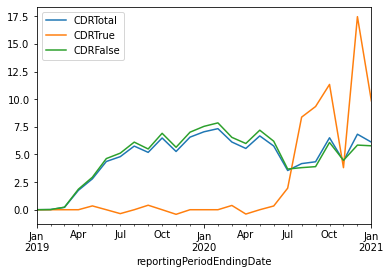

In [24]:
#plot the values
CDRframe.plot(y=['CDRTotal','CDRTrue','CDRFalse'], kind='line')

In [ ]:
#from here and below is useless

In [ ]:
#create a new dataframe to calc the CDR by month
CDRframe=frame.groupby(['reportingPeriodEndingDate'])[['chargedoffPrincipalAmount','reportingPeriodBeginningLoanBalanceAmount']].sum()

In [ ]:
CDRframe

In [ ]:
#calc the CDR for each period
CDRframe['CDR']=(1-pow((1-CDRframe['chargedoffPrincipalAmount']/CDRframe['reportingPeriodBeginningLoanBalanceAmount']),12))*100
CDRframe['CDR']

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
frame.groupby(['reportingPeriodEndingDate'])[['chargedoffPrincipalAmount','reportingPeriodBeginningLoanBalanceAmount']].sum()

In [ ]:
frame.groupby(['reportingPeriodEndingDate','COVIDExt'])[['reportingPeriodBeginningLoanBalanceAmount']].count()